In [418]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import operator

In [419]:
demo = False
if (demo):
    file = 'input_ex1.txt'
else:
    # Puzzle input
    file = 'input.txt'

In [420]:
file = open(file, 'r')
input = file.readlines()
file.close()

In [421]:
class Node():
    def __init__(self, name, flow_rate) -> None:
        self.name = name
        self.flow_rate = flow_rate
        self.valve_open = False
        self.connections = []

    def add_connection(self, node):
        self.connections.append(node)

    def to_string(self):
        s = str(self.name)+": "+str(self.flow_rate)+" -"
        for c in self.connections:
            s += " " + c.name
        return s
    

In [422]:
def print_nodes():
    for n in nodes.values():
        print(n.to_string())

In [423]:
# read input data and create nodes
nodes = {}
connections = {}
for line in input:
    split = re.split(' |=|;|,', line.strip())
    nodes[split[1]] = (Node(split[1], int(split[5])))
    clist = []
    for i in range(11, len(split), 2):
        clist.append(split[i])
    connections[split[1]] = clist
for k,v in connections.items():
    for n in v:
        nodes[k].add_connection(nodes[n])


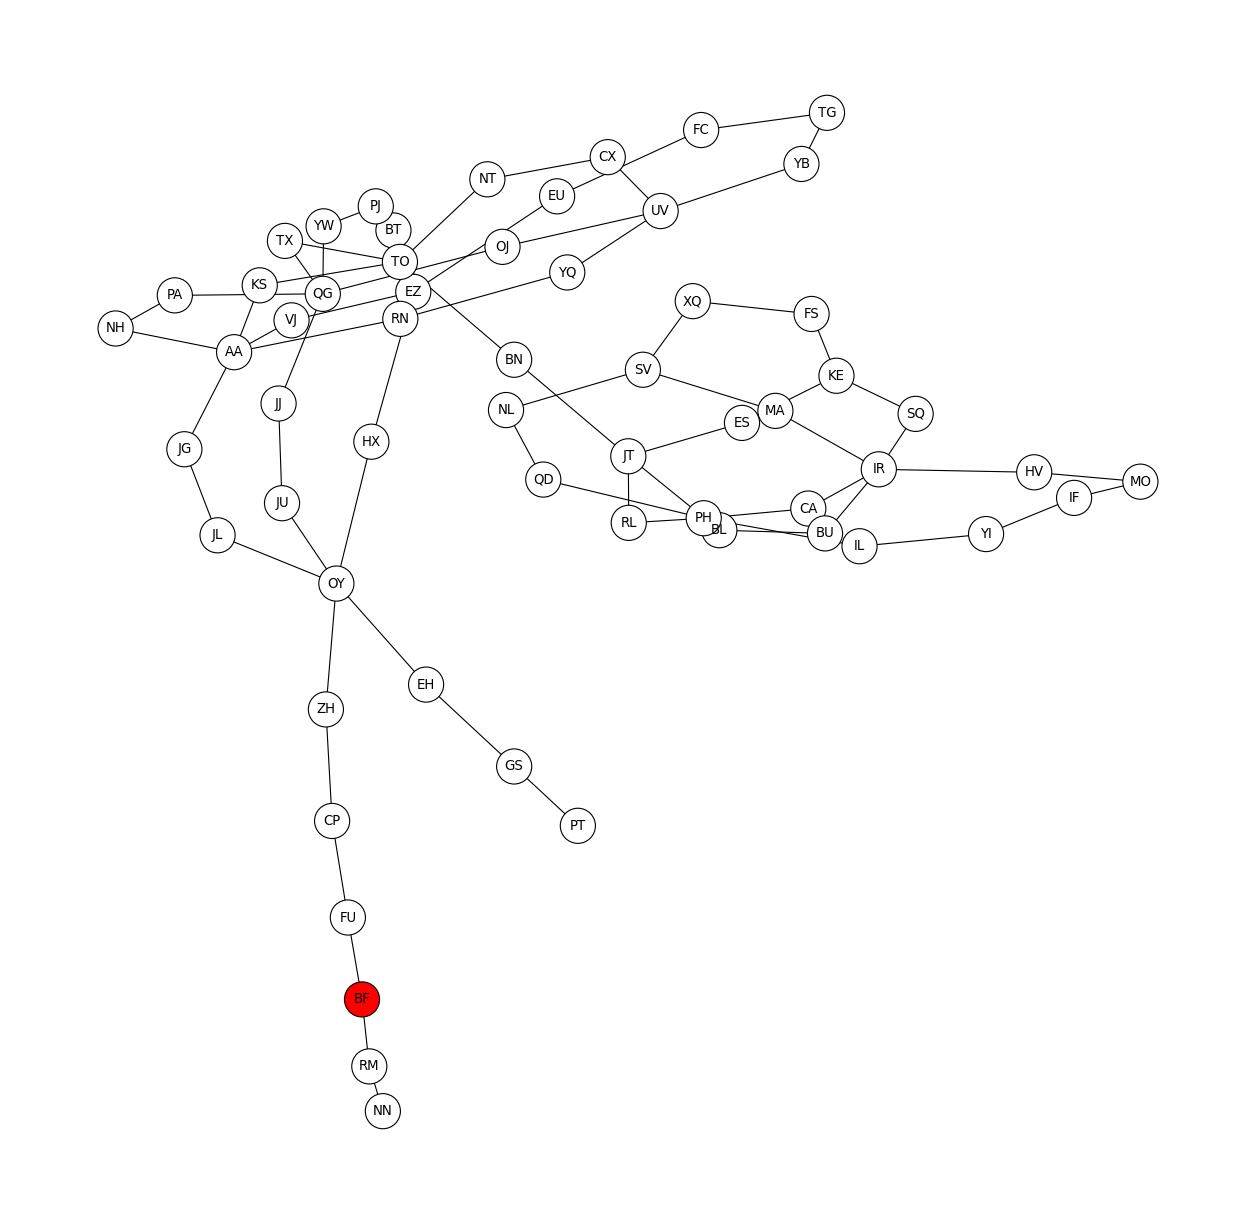

In [424]:
# create graph
plt.figure(num=None, figsize=(20, 20), dpi=80)

G = nx.Graph()

color_map = []

for node in nodes.values():
    node_name = str(node.name)
    G.add_node(node_name)
    # in the color_map entries for AA and BF are switched
    # I don't know why
    if demo:
        if node.name == "AA":
            color_map.append("red")
        else:
            color_map.append("white")
    else:   
        if node.name == "BF":
            color_map.append("red")
        else:
            color_map.append("white")

    for c in node.connections:
        G.add_edge(node.name, c.name)

options = {
    "font_size": 12,
    "node_size": 1000,
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

nx.draw_networkx(G, node_color=color_map, **options)

plt.axis("off")

plt.show()



In [425]:
def distance_bw_nodes(n1, n2, visited):
    vs = visited.copy()
    vs.append(n1)

    if (n1 == n2):
        return 0
    
    shortest_distance = 100
    distance = 0
    for c in n1.connections:
        if (c in vs):
            continue        
        distance = distance_bw_nodes(c, n2, vs)
        if distance < shortest_distance:
            shortest_distance = distance

    return shortest_distance + 1

In [426]:
def get_most_lucrative_node(remaining_time, current_node):
    node_fr = {}
    for n in nodes.values():
        if n.valve_open:
            continue
        # travel time + activation
        time_needed = distance_bw_nodes(current_node, n, []) + 1
        node_fr[n] = (remaining_time - time_needed) * n.flow_rate
    return max(node_fr, key=node_fr.get)

In [427]:
def take_path_through_top_x_most_lucrative_nodes(x, current_node, remaining_time, activations):
    if (remaining_time <= 0):
        return 0

    act = activations.copy()
    act.append(current_node)

    node_fr = {}
    time_needed = 0
    for n in nodes.values():
        if n in act:
            continue
        # travel time + activation
        time_needed = distance_bw_nodes(current_node, n, []) + 1
        if time_needed >= remaining_time:
            continue
        node_fr[n] = (remaining_time - time_needed) * n.flow_rate

    if node_fr == {}:
        return 0

    # follow path for top x nodes
    node_fr = dict(sorted(node_fr.items(), key=operator.itemgetter(1),reverse=True))
    results = []
    for i in range(x):
        if i >= len(node_fr):
            break;
        best_node = list(node_fr)[i]
        time_needed = distance_bw_nodes(current_node, best_node, []) + 1
        results.append(list(node_fr.values())[i] + take_path_through_top_x_most_lucrative_nodes(x, best_node, remaining_time-time_needed, act))

    return max(results)

In [ ]:
# not tested optimization to reduce solution space
def neighbourhood_value(node, fr_values):
    sum_fr = 0
    for c in node.connections:
        if c in fr_values.keys():
            sum_fr = fr_values[c]
    return sum_fr

In [ ]:
# not tested optimization to reduce solution space
def neighbourhood_values(fr_values):
    nh_values = {}
    for node in fr_values.keys():
        nh_values[node] = neighbourhood_value(node, fr_values)
    return nh_values

In [428]:
# remove nodes with 0 flow from node list to reduce runtime
for n in nodes.copy().values():
    if n.flow_rate == 0 and n.name != "AA":
        nodes.pop(n.name)
print_nodes()

JT: 9 - ES RL BL BN
PH: 20 - IL CA RL QD
IR: 13 - HV CA BU MA SQ
SV: 16 - NL MA XQ
UV: 19 - YB OJ YQ CX
EZ: 8 - BT EU VJ PJ HX
KE: 21 - ES SQ FS
OY: 11 - HX JL ZH EH JU
NN: 23 - RM
FU: 14 - BF CP
PT: 18 - GS
IF: 25 - MO YI
TO: 3 - BT NT TX BN KS
FC: 22 - TG EU
AA: 0 - RN NH VJ JG KS
QG: 5 - TX JJ PA YW OJ


In [429]:
# for the input a path width of 10 is needed to get the optimum
take_path_through_top_x_most_lucrative_nodes(10, nodes["AA"], 30, [])
# 1716 - 24.5 min

1716